# Loading and Handling TS in Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
data = pd.read_csv('Desktop/trainerDataTS.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

   id                 date  windspeed  temperature  solarflux  humidity  \
0   1  01/08/2000 00:30:00    9.61883      60.2620        0.0   0.80000   
1   2  01/08/2000 00:45:00    9.47203      60.1664        0.0   0.80156   
2   3  01/08/2000 01:00:00    9.31125      60.0145        0.0   0.80375   
3   4  01/08/2000 01:15:00    9.13649      59.8064        0.0   0.80656   
4   5  01/08/2000 01:30:00    8.94775      59.5420        0.0   0.81000   

   clearingprice  
0           0.14  
1           0.22  
2           0.14  
3           0.14  
4           0.14  

 Data Types:
id                 int64
date              object
windspeed        float64
temperature      float64
solarflux        float64
humidity         float64
clearingprice    float64
dtype: object


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S')
data = pd.read_csv('Desktop/trainerDataTS.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)
print (data.head())

                     id  windspeed  temperature  solarflux  humidity  \
date                                                                   
2000-08-01 00:30:00   1    9.61883      60.2620        0.0   0.80000   
2000-08-01 00:45:00   2    9.47203      60.1664        0.0   0.80156   
2000-08-01 01:00:00   3    9.31125      60.0145        0.0   0.80375   
2000-08-01 01:15:00   4    9.13649      59.8064        0.0   0.80656   
2000-08-01 01:30:00   5    8.94775      59.5420        0.0   0.81000   

                     clearingprice  
date                                
2000-08-01 00:30:00           0.14  
2000-08-01 00:45:00           0.22  
2000-08-01 01:00:00           0.14  
2000-08-01 01:15:00           0.14  
2000-08-01 01:30:00           0.14  


In [9]:
#check datatype of index
data.index

DatetimeIndex(['2000-08-01 00:30:00', '2000-08-01 00:45:00',
               '2000-08-01 01:00:00', '2000-08-01 01:15:00',
               '2000-08-01 01:30:00', '2000-08-01 01:45:00',
               '2000-08-01 02:00:00', '2000-08-01 02:15:00',
               '2000-08-01 02:30:00', '2000-08-01 02:45:00',
               ...
               '2000-08-08 21:30:00', '2000-08-08 21:45:00',
               '2000-08-08 22:00:00', '2000-08-08 22:15:00',
               '2000-08-08 22:30:00', '2000-08-08 22:45:00',
               '2000-08-08 23:00:00', '2000-08-08 23:15:00',
               '2000-08-08 23:30:00', '2000-08-08 23:45:00'],
              dtype='datetime64[ns]', name='date', length=766, freq=None)

In [10]:
#convert to time series:
ts = data['clearingprice']
ts.head(10)

date
2000-08-01 00:30:00    0.14
2000-08-01 00:45:00    0.22
2000-08-01 01:00:00    0.14
2000-08-01 01:15:00    0.14
2000-08-01 01:30:00    0.14
2000-08-01 01:45:00    0.14
2000-08-01 02:00:00    0.14
2000-08-01 02:15:00    0.14
2000-08-01 02:30:00    0.14
2000-08-01 02:45:00    0.14
Name: clearingprice, dtype: float64

### Indexing TS arrays:

In [13]:
#1. Specific the index as a string constant:
ts['2000-08-01']

date
2000-08-01 00:30:00    0.1400
2000-08-01 00:45:00    0.2200
2000-08-01 01:00:00    0.1400
2000-08-01 01:15:00    0.1400
2000-08-01 01:30:00    0.1400
2000-08-01 01:45:00    0.1400
2000-08-01 02:00:00    0.1400
2000-08-01 02:15:00    0.1400
2000-08-01 02:30:00    0.1400
2000-08-01 02:45:00    0.1400
2000-08-01 03:00:00    0.1400
2000-08-01 03:15:00    0.1400
2000-08-01 03:30:00    0.1400
2000-08-01 03:45:00    0.1400
2000-08-01 04:00:00    0.1400
2000-08-01 04:15:00    0.1400
2000-08-01 04:30:00    0.1400
2000-08-01 04:45:00    0.1400
2000-08-01 05:00:00    0.1200
2000-08-01 05:15:00    0.1200
2000-08-01 05:30:00    0.1200
2000-08-01 05:45:00    0.1200
2000-08-01 06:00:00    0.1200
2000-08-01 06:15:00    0.1200
2000-08-01 06:30:00    0.1200
2000-08-01 06:45:00    0.1200
2000-08-01 07:00:00    0.1200
2000-08-01 07:15:00    0.1200
2000-08-01 07:30:00    0.1200
2000-08-01 07:45:00    0.1200
                        ...  
2000-08-01 16:30:00    0.1200
2000-08-01 16:45:00    0.1200
2000-

# Get range:

In [14]:
#1. Specify the entire range:
ts['2000-08-01':'2000-08-08']

date
2000-08-01 00:30:00    0.1400
2000-08-01 00:45:00    0.2200
2000-08-01 01:00:00    0.1400
2000-08-01 01:15:00    0.1400
2000-08-01 01:30:00    0.1400
2000-08-01 01:45:00    0.1400
2000-08-01 02:00:00    0.1400
2000-08-01 02:15:00    0.1400
2000-08-01 02:30:00    0.1400
2000-08-01 02:45:00    0.1400
2000-08-01 03:00:00    0.1400
2000-08-01 03:15:00    0.1400
2000-08-01 03:30:00    0.1400
2000-08-01 03:45:00    0.1400
2000-08-01 04:00:00    0.1400
2000-08-01 04:15:00    0.1400
2000-08-01 04:30:00    0.1400
2000-08-01 04:45:00    0.1400
2000-08-01 05:00:00    0.1200
2000-08-01 05:15:00    0.1200
2000-08-01 05:30:00    0.1200
2000-08-01 05:45:00    0.1200
2000-08-01 06:00:00    0.1200
2000-08-01 06:15:00    0.1200
2000-08-01 06:30:00    0.1200
2000-08-01 06:45:00    0.1200
2000-08-01 07:00:00    0.1200
2000-08-01 07:15:00    0.1200
2000-08-01 07:30:00    0.1200
2000-08-01 07:45:00    0.1200
                        ...  
2000-08-08 16:30:00    0.1400
2000-08-08 16:45:00    0.1400
2000-

# Checking for stationarity

### Plot the time-series

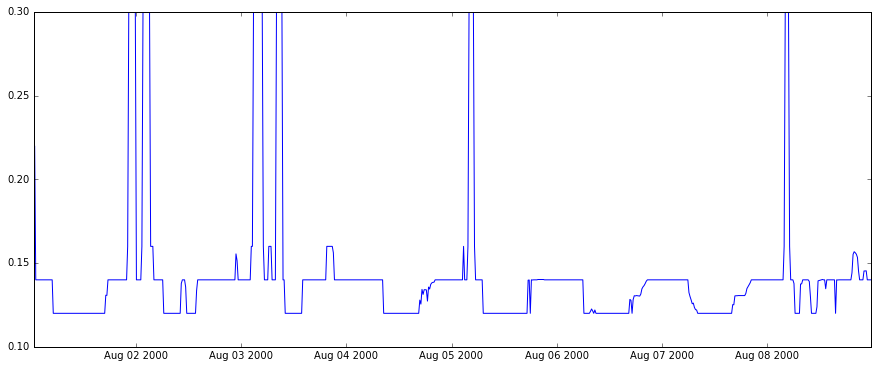

In [15]:
plt.plot(ts)

### Function for testing stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


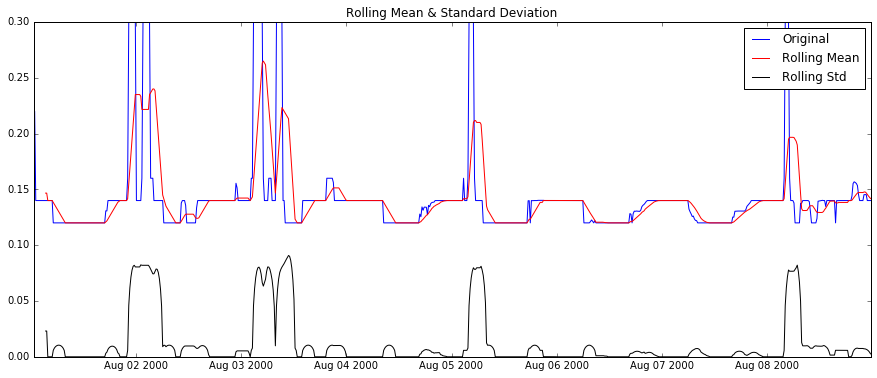

Results of Dickey-Fuller Test:
Test Statistic                  -4.786959
p-value                          0.000058
#Lags Used                      13.000000
Number of Observations Used    752.000000
Critical Value (10%)            -2.568821
Critical Value (5%)             -2.865391
Critical Value (1%)             -3.439076
dtype: float64


In [17]:
test_stationarity(ts)

# Making TS Stationary

## Estimating & Eliminating Trend

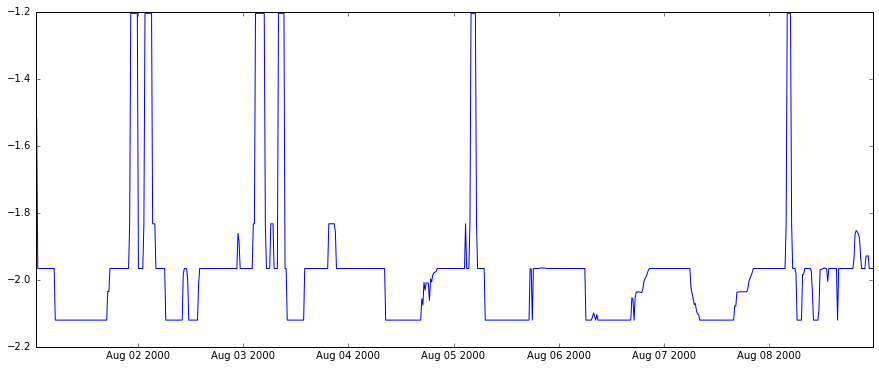

In [18]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=94).mean()
  if __name__ == '__main__':


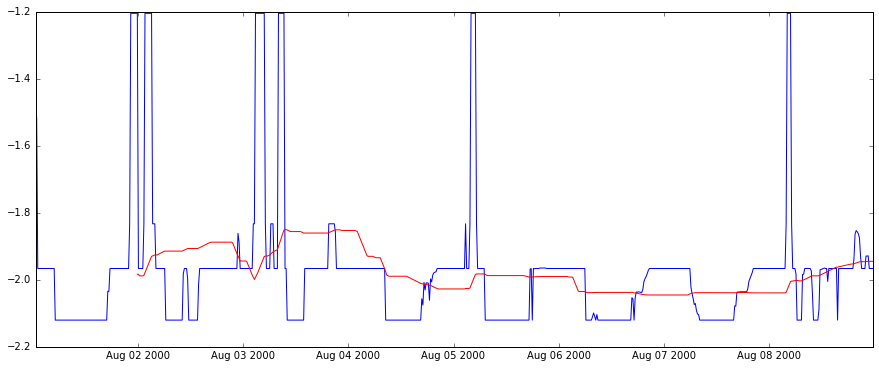

In [19]:
moving_avg = pd.rolling_mean(ts_log,94)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [21]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(94)

date
2000-08-01 00:30:00         NaN
2000-08-01 00:45:00         NaN
2000-08-01 01:00:00         NaN
2000-08-01 01:15:00         NaN
2000-08-01 01:30:00         NaN
2000-08-01 01:45:00         NaN
2000-08-01 02:00:00         NaN
2000-08-01 02:15:00         NaN
2000-08-01 02:30:00         NaN
2000-08-01 02:45:00         NaN
2000-08-01 03:00:00         NaN
2000-08-01 03:15:00         NaN
2000-08-01 03:30:00         NaN
2000-08-01 03:45:00         NaN
2000-08-01 04:00:00         NaN
2000-08-01 04:15:00         NaN
2000-08-01 04:30:00         NaN
2000-08-01 04:45:00         NaN
2000-08-01 05:00:00         NaN
2000-08-01 05:15:00         NaN
2000-08-01 05:30:00         NaN
2000-08-01 05:45:00         NaN
2000-08-01 06:00:00         NaN
2000-08-01 06:15:00         NaN
2000-08-01 06:30:00         NaN
2000-08-01 06:45:00         NaN
2000-08-01 07:00:00         NaN
2000-08-01 07:15:00         NaN
2000-08-01 07:30:00         NaN
2000-08-01 07:45:00         NaN
                         ...   
200

In [22]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2000-08-01 23:45:00    0.779326
2000-08-02 00:00:00    0.017186
2000-08-02 00:15:00    0.021994
2000-08-02 00:30:00    0.021994
2000-08-02 00:45:00    0.021994
Name: clearingprice, dtype: float64

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


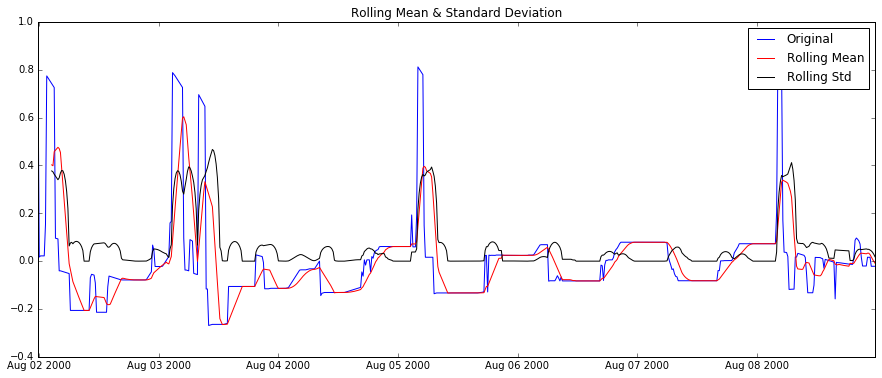

Results of Dickey-Fuller Test:
Test Statistic                -6.419574e+00
p-value                        1.805530e-08
#Lags Used                     9.000000e+00
Number of Observations Used    6.630000e+02
Critical Value (10%)          -2.569097e+00
Critical Value (5%)           -2.865909e+00
Critical Value (1%)           -3.440252e+00
dtype: float64


In [23]:
test_stationarity(ts_log_moving_avg_diff)

## Eliminating Trend and Seasonality

### Differencing:

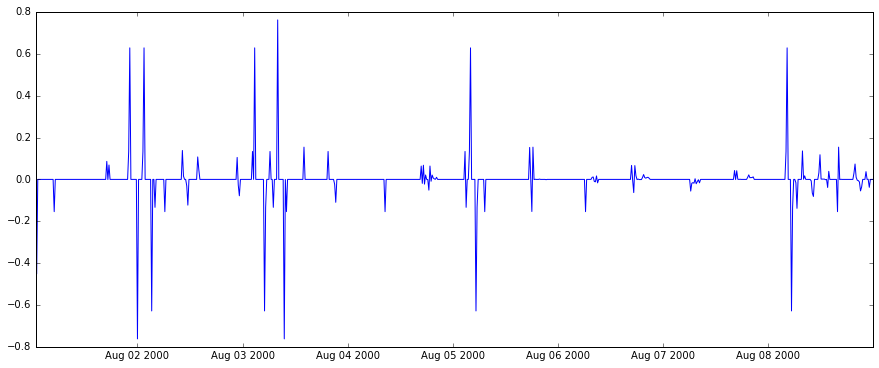

In [24]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


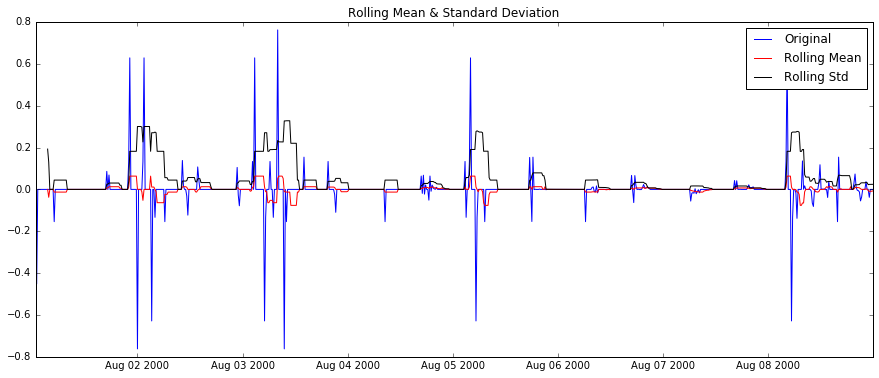

Results of Dickey-Fuller Test:
Test Statistic                -1.089530e+01
p-value                        1.196468e-19
#Lags Used                     1.200000e+01
Number of Observations Used    7.520000e+02
Critical Value (10%)          -2.568821e+00
Critical Value (5%)           -2.865391e+00
Critical Value (1%)           -3.439076e+00
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Final Forecasting

In [26]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

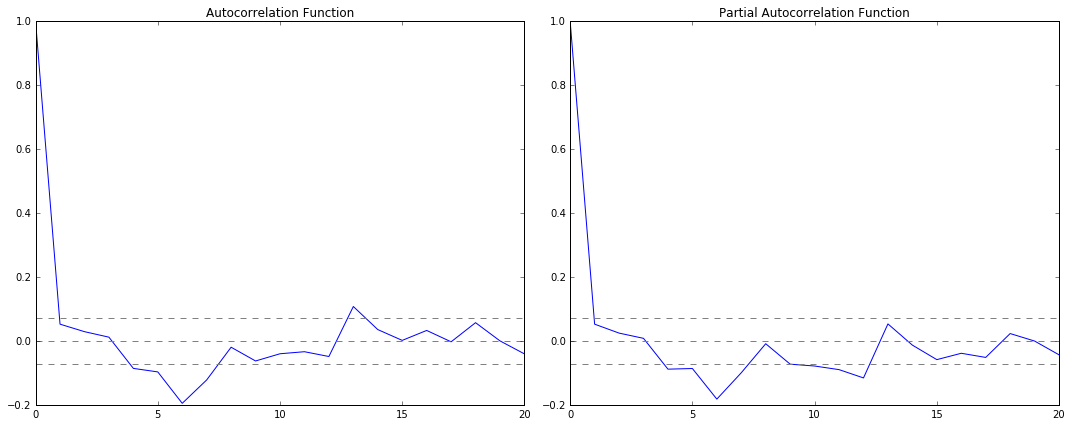

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

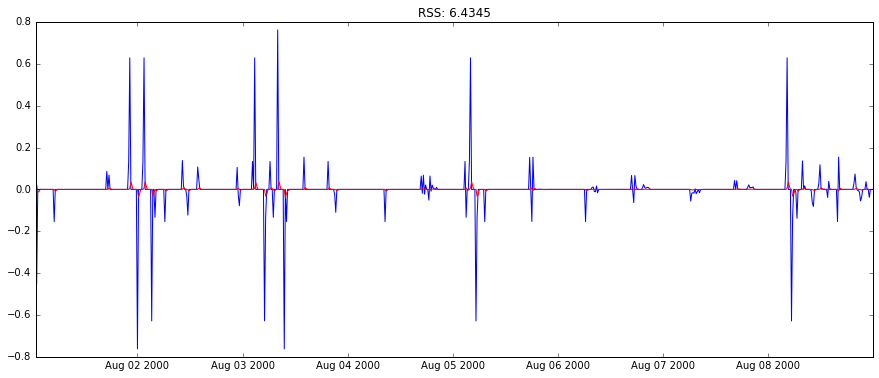

In [117]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

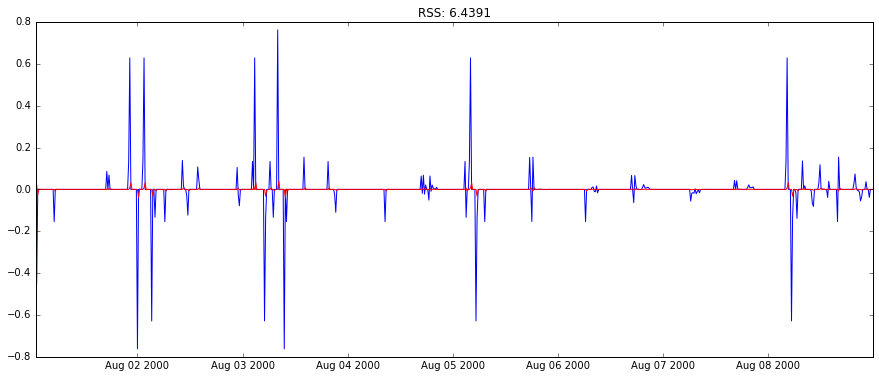

In [118]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

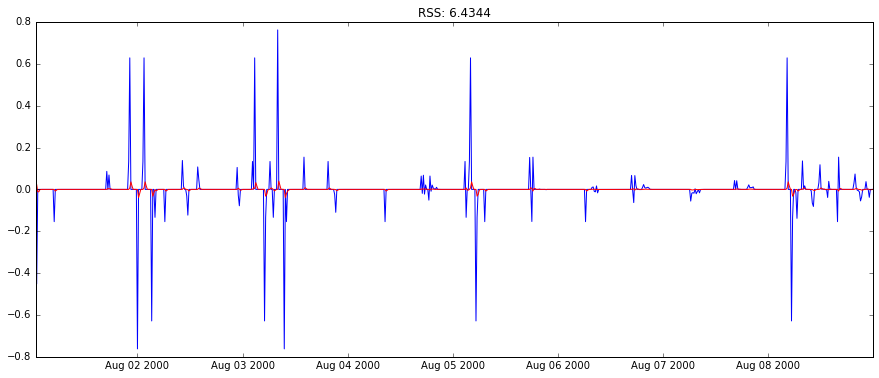

In [119]:
model = ARIMA(ts_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [120]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2000-08-01 00:45:00    0.000033
2000-08-01 01:00:00    0.024049
2000-08-01 01:15:00   -0.011490
2000-08-01 01:30:00   -0.011364
2000-08-01 01:45:00   -0.000400
dtype: float64


In [121]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2000-08-01 00:45:00    0.000033
2000-08-01 01:00:00    0.024082
2000-08-01 01:15:00    0.012592
2000-08-01 01:30:00    0.001228
2000-08-01 01:45:00    0.000828
dtype: float64


In [122]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2000-08-01 00:30:00   -1.966113
2000-08-01 00:45:00   -1.966080
2000-08-01 01:00:00   -1.942031
2000-08-01 01:15:00   -1.953521
2000-08-01 01:30:00   -1.964885
dtype: float64

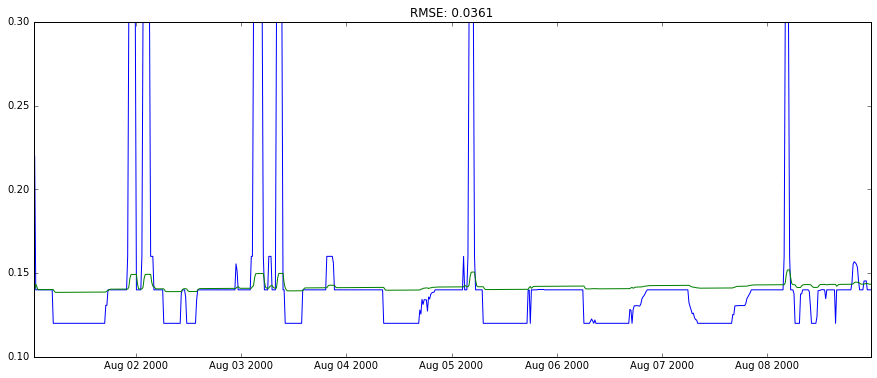

In [123]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))